In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data1 = pd.read_csv(r"C:\Users\Pranitaa Aruchamy\Downloads\sales_data_1.csv")

In [3]:
data1.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


In [4]:
data1.dtypes

Date                 object
Firm bought from     object
Buying price        float64
Customer             object
Selling price       float64
Quantity sold         int64
dtype: object

#### 1. Overall Gross Margin of the business:

In [9]:
data1['tot_rev'] = data1['Selling price'] * data1['Quantity sold']
data1['tot_cog'] = data1['Buying price'] * data1['Quantity sold']

In [11]:
profit = data1['tot_rev'].sum() - data1['tot_cog'].sum()

In [12]:
gross_margin = (profit/data1['tot_rev'].sum())*100

In [17]:
print("Overall Gross Margin of the business : ",round(gross_margin,2),'%')

Overall Gross Margin of the business :  24.63 %


#### 2. Which Seller is Most Profitable

In [25]:
data1['Firm bought from'].unique()

array(['Vendor6', 'Vendor4', 'Vendor7', 'Vendor2', 'Vendor9', 'Vendor3',
       'Vendor1', 'Vendor5', 'Vendor10', 'Vendor8'], dtype=object)

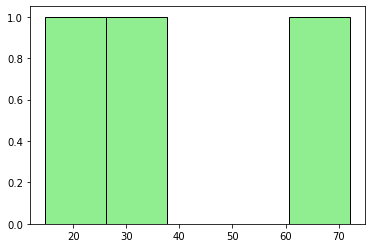

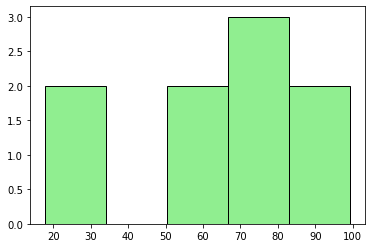

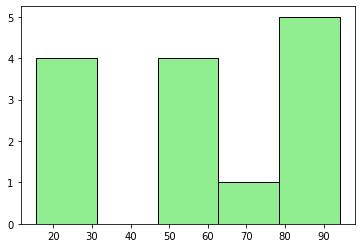

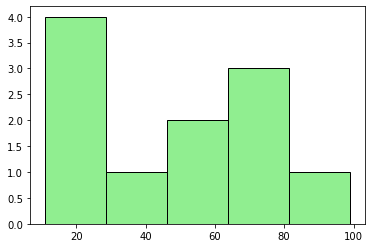

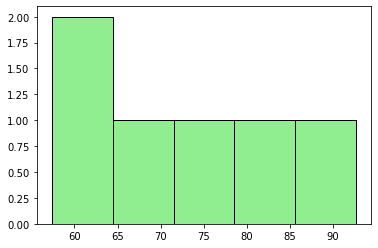

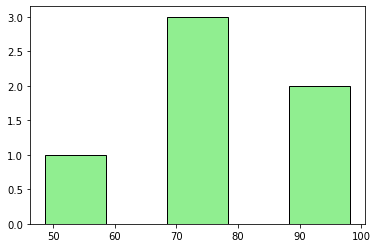

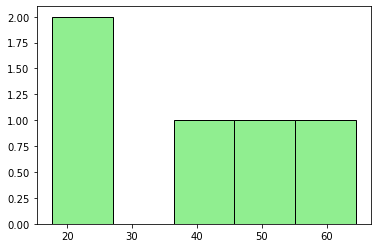

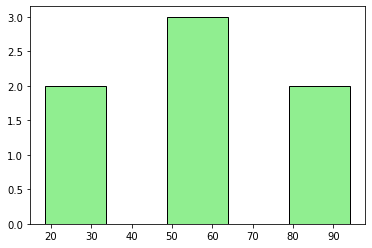

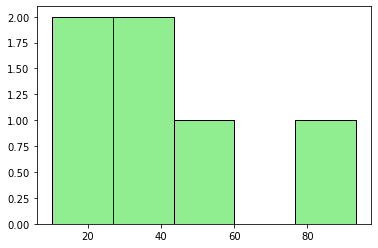

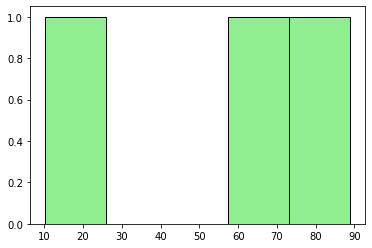

In [64]:
for i in data1['Firm bought from'].unique():
    plt.hist(data1['Buying price'][data1['Firm bought from'] == i], color='lightgreen', ec='black', bins=5)
    plt.show()

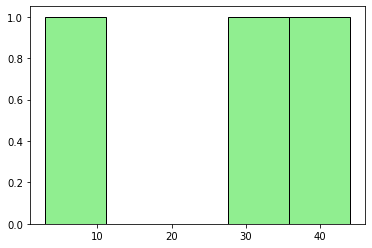

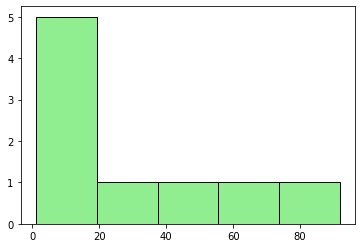

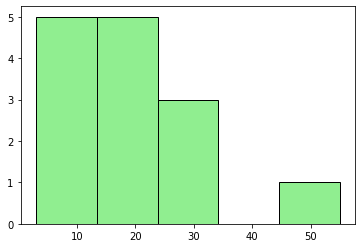

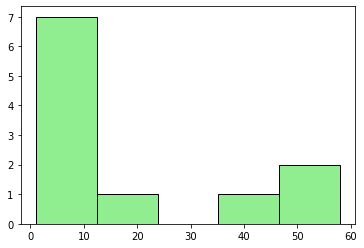

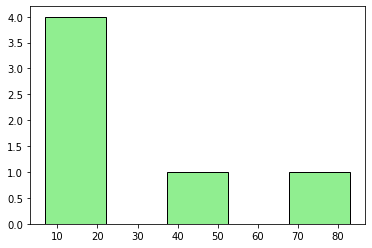

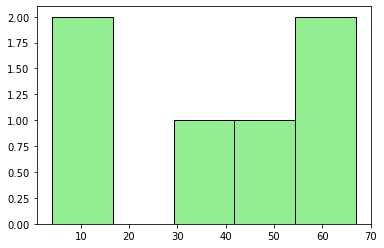

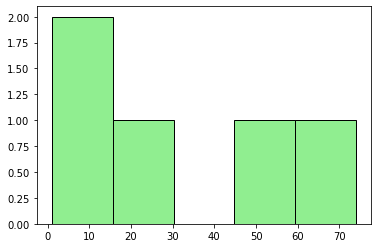

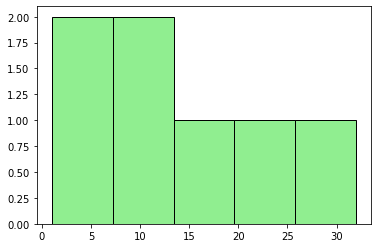

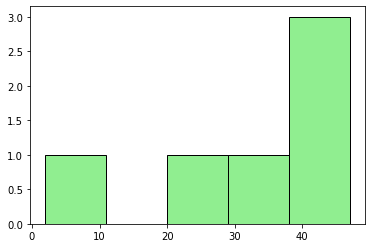

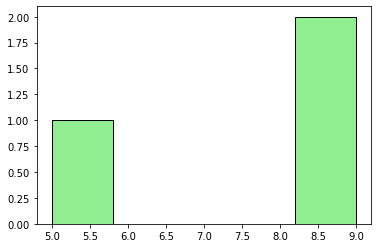

In [66]:
for i in data1['Firm bought from'].unique():
    plt.hist(data1['Quantity sold'][data1['Firm bought from'] == i], color='lightgreen', ec='black', bins=5)
    plt.show()

In [57]:
temp = data1.groupby('Firm bought from').apply(lambda x: pd.Series({
      'buy_price'       : x['Buying price'].median(),
      'sel_price'       : x['Selling price'].median(),
      'quantity'      : x['Quantity sold'].median()
  })
)

In [58]:
temp['rev'] = temp['sel_price']*temp['quantity']
temp['cog'] = temp['buy_price']*temp['quantity']

In [59]:
temp.head(2)

,buy_price,sel_price,quantity,rev,cog
Firm bought from,,,,,
Vendor1,40.63,53.71,22.0,1181.62,893.86
Vendor10,37.32,42.30,37.0,1565.10,1380.84


In [60]:
temp['profit'] = temp['rev'] - temp['cog']

In [61]:
temp.sort_values(by=['profit'],ascending = False,inplace=True)

In [62]:
print("Vendor with the most profitable : ",temp.index[0])

Vendor with the most profitable :  Vendor3


#### 3. Which Customer is Least Profitable

In [67]:
temp = data1.groupby('Customer').apply(lambda x: pd.Series({
      'buy_price'       : x['Buying price'].median(),
      'sel_price'       : x['Selling price'].median(),
      'quantity'      : x['Quantity sold'].median()
  })
)

In [68]:
temp['rev'] = temp['sel_price']*temp['quantity']
temp['cog'] = temp['buy_price']*temp['quantity']

In [69]:
temp.head(2)

,buy_price,sel_price,quantity,rev,cog
Customer,,,,,
Customer1,76.025,104.47,29.5,3081.865,2242.7375
Customer10,52.630,70.75,49.0,3466.750,2578.8700


In [70]:
temp['profit'] = temp['rev'] - temp['cog']

In [72]:
temp.sort_values(by=['profit'],inplace=True)

In [73]:
print("Customer with the least profit : ",temp.index[0])

Customer with the least profit :  Customer5


#### 4. Which Day of the week is more profitable for them

In [76]:
data1['Date'] = pd.to_datetime(data1['Date'])

In [80]:
data1['Day'] = data1['Date'].dt.strftime('%A')

In [82]:
temp = data1.groupby("Day")['Buying price','Selling price','Quantity sold'].median()

<ipython-input-82-a4d6b173e96a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = data1.groupby("Day")['Buying price','Selling price','Quantity sold'].median()


In [83]:
temp['rev'] = temp['Selling price']*temp['Quantity sold']
temp['cog'] = temp['Buying price']*temp['Quantity sold']

In [84]:
temp.head(2)

,Buying price,Selling price,Quantity sold,rev,cog
Day,,,,,
Friday,30.345,42.685,21.5,917.7275,652.4175
Monday,74.710,96.945,19.5,1890.4275,1456.8450


In [85]:
temp['profit'] = temp['rev'] - temp['cog']

In [86]:
temp.sort_values(by=['profit'],inplace=True)

In [89]:
print("Most Profitable Day of the week : ",temp.index[-1])

Most Profitable Day of the week :  Monday


#### 5. Least Profitable Day of the week 

In [90]:
print("Least Profitable Day of the week : ",temp.index[0])

Least Profitable Day of the week :  Thursday


# Data 2

In [91]:
data2 = pd.read_csv(r"C:\Users\Pranitaa Aruchamy\Downloads\sales_data_2.csv")

#### 6. Can you calculate a 3-day average of the daily gross profit

In [93]:
data2.dtypes

Date                 object
Firm bought from     object
Buying price        float64
Quantity bought       int64
Customer             object
Selling price       float64
Quantity sold         int64
dtype: object

In [94]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [96]:
data2['cog'] = data2['Buying price']*data2['Quantity bought']
data2['rev'] = data2['Selling price']*data2['Quantity sold']

In [109]:
data2['profit'] = data2['rev'] - data2['cog']


In [104]:
temp = data2.groupby('Date')['profit'].sum().reset_index()

In [110]:
temp

,Date,profit
0,2023-08-21,-6280.83
1,2023-08-22,-12285.39
2,2023-08-23,-8939.81
3,2023-08-24,-4778.46
4,2023-08-25,-10344.47
5,2023-08-26,-8788.41
6,2023-08-27,-14616.06


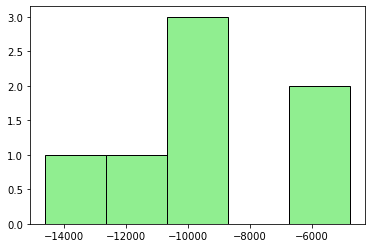

In [105]:
plt.hist(temp['profit'], color='lightgreen', ec='black', bins=5)
plt.show()

In [121]:
mov_df = pd.DataFrame({'Date':temp['Date'],"Moving Average" : temp['profit'].rolling(window=3).mean()})
print("3-day Rolling average for the dialy Gross Profit :\n\n",mov_df)

3-day Rolling average for the dialy Gross Profit :

         Date  Moving Average
0 2023-08-21             NaN
1 2023-08-22             NaN
2 2023-08-23    -9168.676667
3 2023-08-24    -8667.886667
4 2023-08-25    -8020.913333
5 2023-08-26    -7970.446667
6 2023-08-27   -11249.646667


#### 7.Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

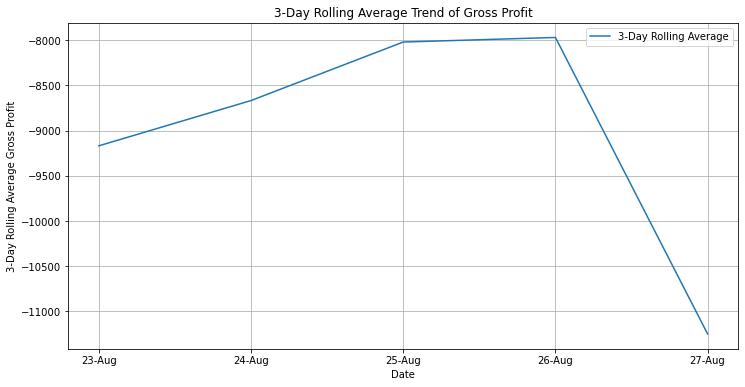

In [135]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))
plt.plot(mov_df['Date'], mov_df['Moving Average'], label='3-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('3-Day Rolling Average Gross Profit')
plt.title('3-Day Rolling Average Trend of Gross Profit')
plt.legend()
plt.grid(True)
date_format = mdates.DateFormatter("%d-%b")
plt.gca().xaxis.set_major_formatter(date_format)

# Set the major locator to control the spacing of the ticks (1 day interval)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.show()

#### 8. Can you optimize the sales process to ensure gross margin is maximized?
######    1. Would you fire any vendor?
###### 2.Would you let go of any customer? 

In [149]:
# data2.groupby('Firm bought from')['profit'].sum()
temp = data2.groupby('Firm bought from').apply(lambda x: pd.Series({
      'profit'       : x['profit'].sum(),
      'sel_price'       : x['Selling price'].median(),
      'buy_price'      : x['Buying price'].median()
  })
).reset_index()

In [158]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=temp['Firm bought from'], y=temp['sel_price'], name="Selling Price", mode="lines"),
    secondary_y=True
)
fig.add_trace(
    go.Scatter(x=temp['Firm bought from'], y=temp['buy_price'], name="Buying Price", mode="lines"),
    secondary_y=True
)

fig.add_trace(
    go.Bar(x=temp['Firm bought from'], y=temp['profit'], name="Vendor"),
    secondary_y=False
)

fig.update_xaxes(title_text="Vendor")

# Set y-axes titles
fig.update_yaxes(title_text="Profit", secondary_y=False)
fig.update_yaxes(title_text="Price", secondary_y=True)

fig.show()

In [159]:
temp = data2.groupby('Customer').apply(lambda x: pd.Series({
      'profit'       : x['profit'].sum(),
      'sel_price'       : x['Selling price'].median(),
      'buy_price'      : x['Buying price'].median()
  })
).reset_index()

In [160]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=temp['Customer'], y=temp['sel_price'], name="Selling Price", mode="lines"),
    secondary_y=True
)
fig.add_trace(
    go.Scatter(x=temp['Customer'], y=temp['buy_price'], name="Buying Price", mode="lines"),
    secondary_y=True
)

fig.add_trace(
    go.Bar(x=temp['Customer'], y=temp['profit'], name="Customer"),
    secondary_y=False
)

fig.update_xaxes(title_text="Customer")

# Set y-axes titles
fig.update_yaxes(title_text="Profit", secondary_y=False)
fig.update_yaxes(title_text="Price", secondary_y=True)

fig.show()

In [174]:
import plotly.express as px

temp = data2.groupby(['Firm bought from','Customer']).apply(lambda x: pd.Series({
      'profit'       : x['profit'].sum(),
      'sel_price'       : x['Selling price'].median(),
      'buy_price'      : x['Buying price'].median()
  })
).reset_index()

long_df = px.data.medals_long()

fig = px.bar(temp, x="Firm bought from", y="profit", color="Customer", title="Vendor-Customer Relationship")
fig.show()

#### Answer for Question 8

#### 9. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 

In [165]:
buying_price_percentiles = data2['Buying price'].quantile([0.25, 0.5, 0.75])
print("25th, 50th, 75th percentile for Buying price :")
buying_price_percentiles

25th, 50th, 75th percentile for Buying price :


0.25    29.90
0.50    60.76
0.75    78.32
Name: Buying price, dtype: float64

In [166]:
selling_price_percentiles = data2['Selling price'].quantile([0.25, 0.5, 0.75])
print("25th, 50th, 75th percentile for Selling price :")
selling_price_percentiles

25th, 50th, 75th percentile for Selling price :


0.25     38.9750
0.50     78.9900
0.75    103.3975
Name: Selling price, dtype: float64

#### 10. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [171]:
below_25th_percentile_buying = (data2['Buying price'] < buying_price_percentiles[0.25]).sum()
above_75th_percentile_selling = (data2['Selling price'] > selling_price_percentiles[0.75]).sum()

In [172]:
print("Sapota's Buying Price Falls Below 25th Percentile", below_25th_percentile_buying, "times")
print("Sapota's Selling Price Falls Above 75th Percentile", above_75th_percentile_selling, "times")

Sapota's Buying Price Falls Below 25th Percentile 18 times
Sapota's Selling Price Falls Above 75th Percentile 18 times


### Ram’s manager, Bharath comes in

##### 11. Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 

In [176]:
vendor_4_transactions = data2[data2['Firm bought from'] == 'Vendor4']

initial_optimal_gross_margin = (data2['Selling price'] - data2['Buying price']).sum()

updated_data = data2.copy() 
updated_data.loc[updated_data['Firm bought from'] == 'Vendor4', 'Buying price'] += 5  
updated_optimal_gross_margin = (updated_data['Selling price'] - updated_data['Buying price']).sum()

impact_on_gross_margin = updated_optimal_gross_margin - initial_optimal_gross_margin

print(f"Impact on optimal gross margin after honoring Vendor 4: {impact_on_gross_margin}")


Impact on optimal gross margin after honoring Vendor 4: -45.0


#### 12. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
######    - What’s the theoretical max margin the firm could have from that branch?

In [177]:
data = pd.read_csv(r"C:\Users\Pranitaa Aruchamy\Downloads\sales_data_2.csv")

vendor_gross_margins = data.groupby('Firm bought from')['Selling price'].sum() - data.groupby('Firm bought from')['Buying price'].sum()

max_margin_vendor = vendor_gross_margins.idxmax()
max_margin = vendor_gross_margins.max()

theoretical_max_margin = (data['Selling price'] - data['Buying price']).sum()

print(f"Vendor with the highest gross margin: {max_margin_vendor}")
print(f"Highest gross margin: {max_margin}")
print(f"Theoretical maximum gross margin for the branch: {theoretical_max_margin}")


Vendor with the highest gross margin: Vendor7
Highest gross margin: 224.9799999999999
Theoretical maximum gross margin for the branch: 1207.1999999999998


#### 13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down)

In [178]:
#Price Elasticity = (% Change in Quantity Demanded) / (% Change in Price)

initial_quantity_sold = data['Quantity sold'].sum()
initial_revenue = (data['Selling price'] * data['Quantity sold']).sum()

price_change = 1

data['Selling price'] += price_change
new_quantity_sold_increase = data['Quantity sold'].sum()
new_revenue_increase = (data['Selling price'] * data['Quantity sold']).sum()

data['Selling price'] -= 2 * price_change  
new_quantity_sold_decrease = data['Quantity sold'].sum()
new_revenue_decrease = (data['Selling price'] * data['Quantity sold']).sum()

percentage_change_quantity_increase = ((new_quantity_sold_increase - initial_quantity_sold) / initial_quantity_sold) * 100
percentage_change_quantity_decrease = ((new_quantity_sold_decrease - initial_quantity_sold) / initial_quantity_sold) * 100


elasticity_increase = percentage_change_quantity_increase / 1  # Price increase by Rs. 1
elasticity_decrease = percentage_change_quantity_decrease / 1  # Price decrease by Rs. 1

print(f"Price Elasticity (Price Increase by Rs. 1): {elasticity_increase}")
print(f"Price Elasticity (Price Decrease by Rs. 1): {elasticity_decrease}")


Price Elasticity (Price Increase by Rs. 1): 0.0
Price Elasticity (Price Decrease by Rs. 1): 0.0
